In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
sys.path.append(os.path.join(os.path.abspath(''), 'triple_agent'))
from triple_agent.replays.get_parsed_replays import get_parsed_replays
from triple_agent.utilities.action_tests import ActionTest
from triple_agent.utilities.outcomes import WinType
from triple_agent.utilities.missions import Missions

In [3]:
from triple_agent.reports.mission_choices import print_mission_choices
from triple_agent.reports.mission_completes import mission_completion, mission_completion_query
from triple_agent.reports.action_tests import action_test_percentages, difficult_action_test_percentages
from triple_agent.reports.fingerprints import attempted_fingerprint_sources
from triple_agent.reports.banana_breads import all_banana_bread_percentages, first_banana_bread_percentages, banana_split
from triple_agent.reports.character_selection import spy_selection, st_selection, amba_selection
from triple_agent.reports.bug import bug_attempt_timings, bug_success_rate
from triple_agent.reports.time_adds import time_add_times, time_add_times_per_game
from triple_agent.reports.game_outcomes import game_outcomes
from triple_agent.reports.seduce import first_flirt_timing
from triple_agent.reports.report_utilities import SCL5_PICK_MODES, SCL5_VENUE_MODES
from triple_agent.reports.stop_talks import stop_talk_in_game_percentage
from triple_agent.reports.mission_progress import mission_progress
from triple_agent.reports.microfilm import at_or_direct_mf, microfilm_direction

In [4]:
player = 'Calvin Schoolidge'

In [5]:
opp_spy_replays = get_parsed_replays(lambda g: g.spy == player)
opp_sniper_replays = get_parsed_replays(lambda g: g.sniper == player)

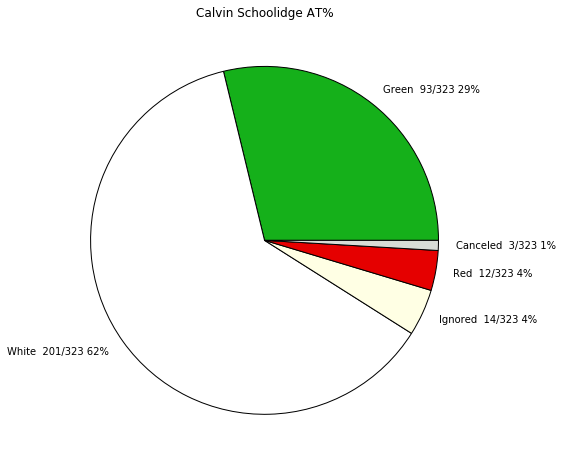

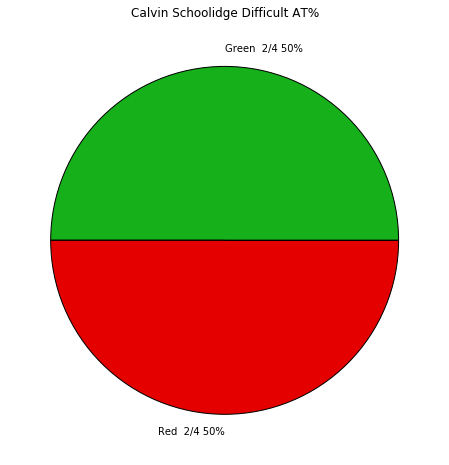

In [6]:
action_test_percentages(opp_spy_replays, f"{player} AT%")
difficult_action_test_percentages(opp_spy_replays, f"{player} Difficult AT%")

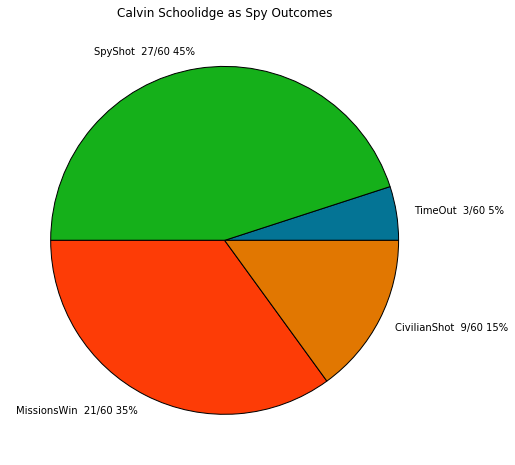

In [7]:
game_outcomes(opp_spy_replays, f"{player} as Spy Outcomes")

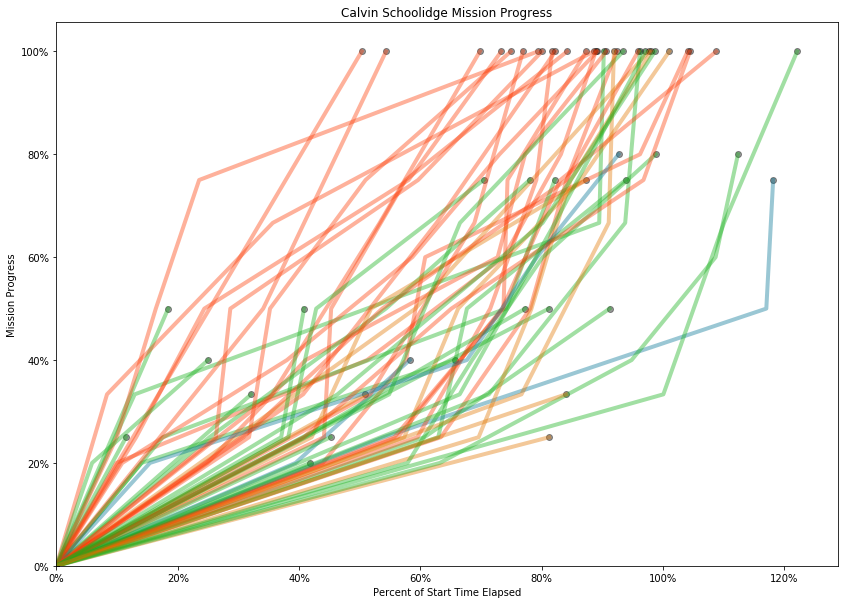

In [8]:
mission_progress(opp_spy_replays, f"{player} Mission Progress")

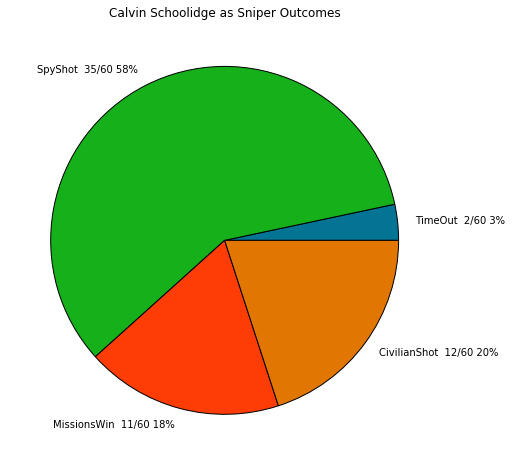

In [9]:
game_outcomes(opp_sniper_replays, f"{player} as Sniper Outcomes")

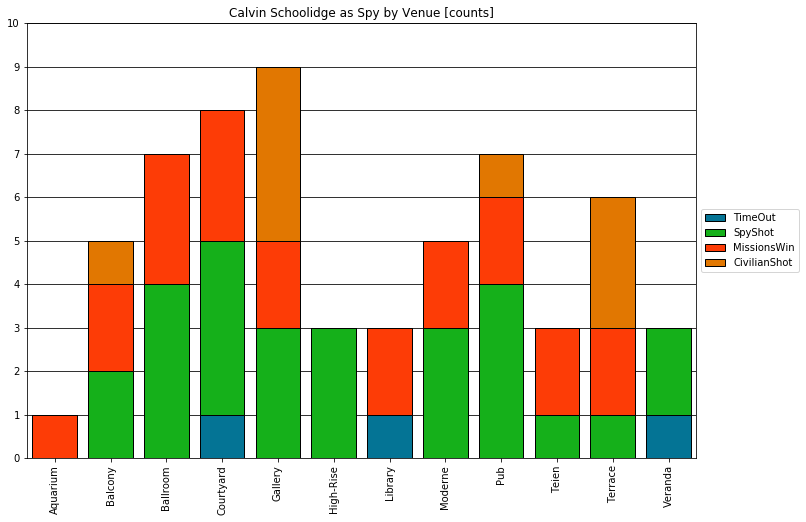

In [10]:
game_outcomes(opp_spy_replays, f"{player} as Spy by Venue", groupby=lambda g: g.venue, percentile_plot=False)

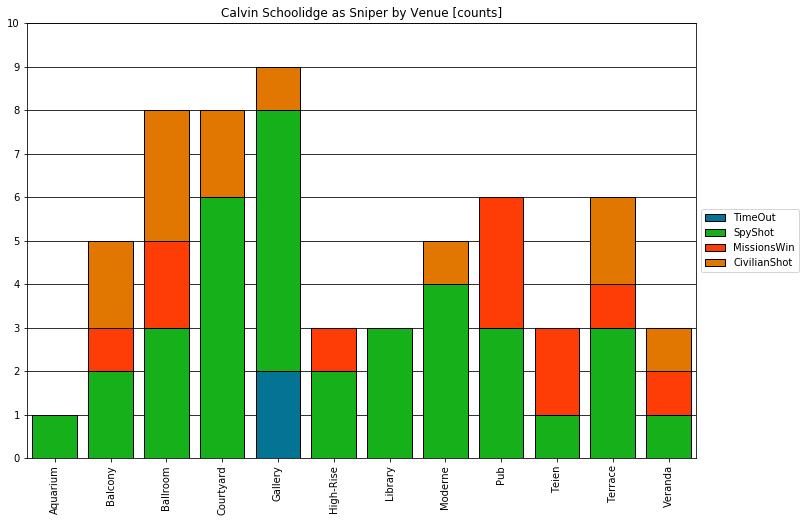

In [11]:
game_outcomes(opp_sniper_replays, f"{player} as Sniper by Venue", groupby=lambda g: g.venue, percentile_plot=False)

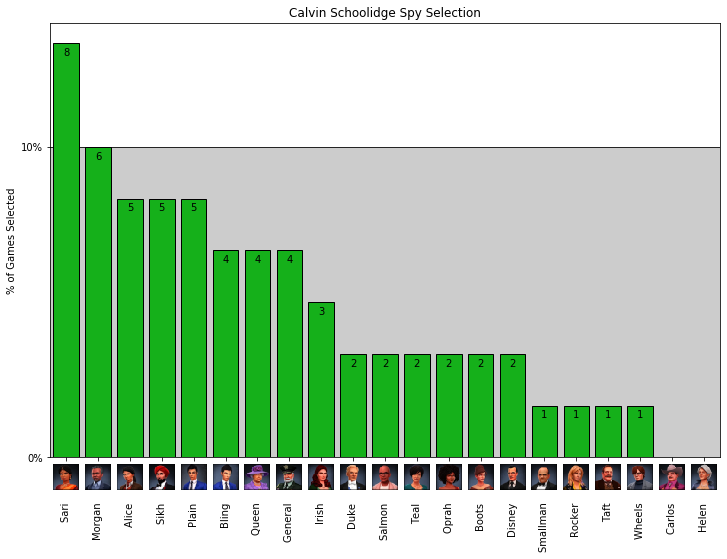

In [12]:
spy_selection(opp_spy_replays, f"{player} Spy Selection")

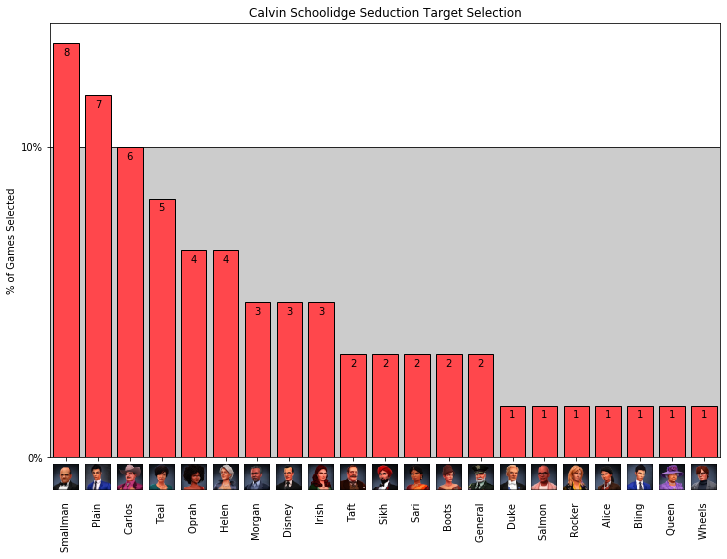

In [13]:
st_selection(opp_spy_replays, f"{player} Seduction Target Selection")

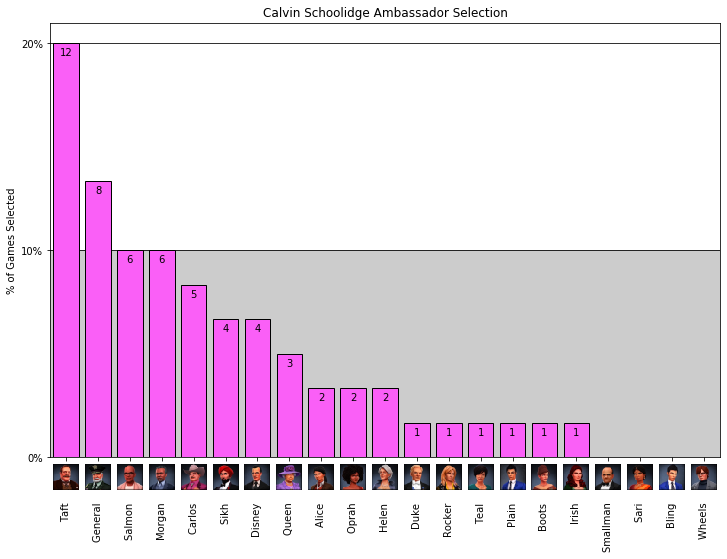

In [14]:
amba_selection(opp_spy_replays, f"{player} Ambassador Selection")

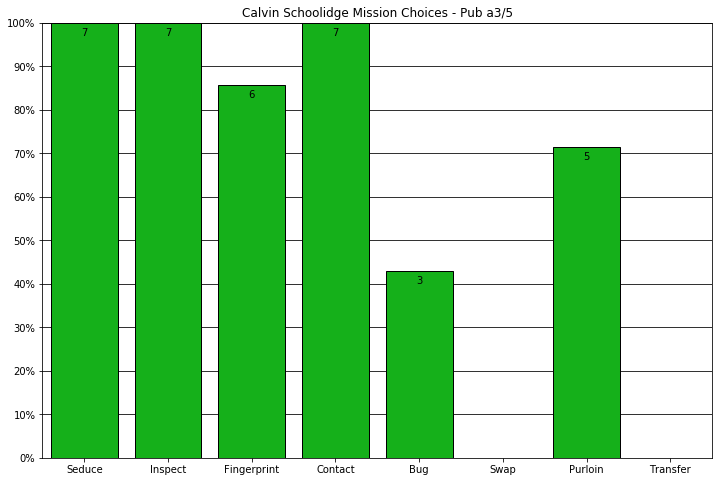

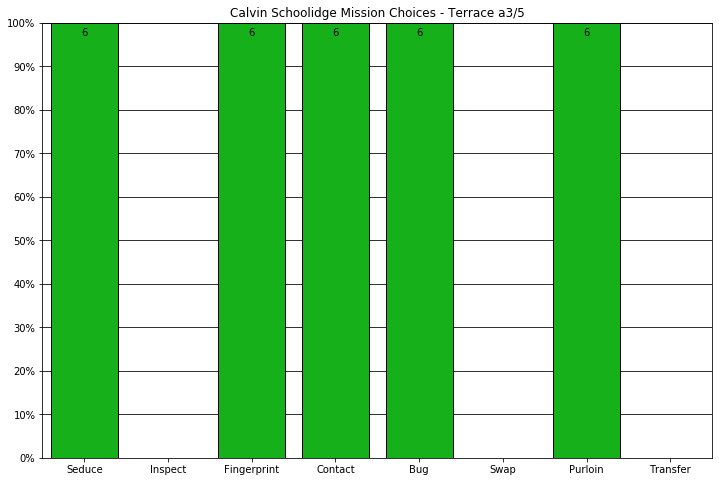

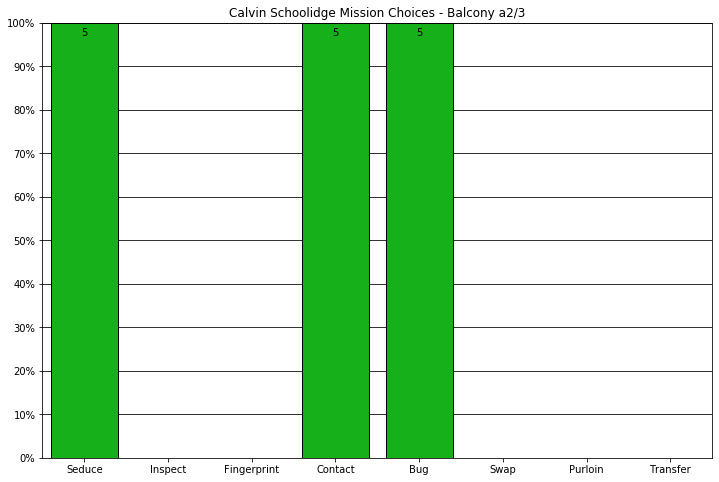

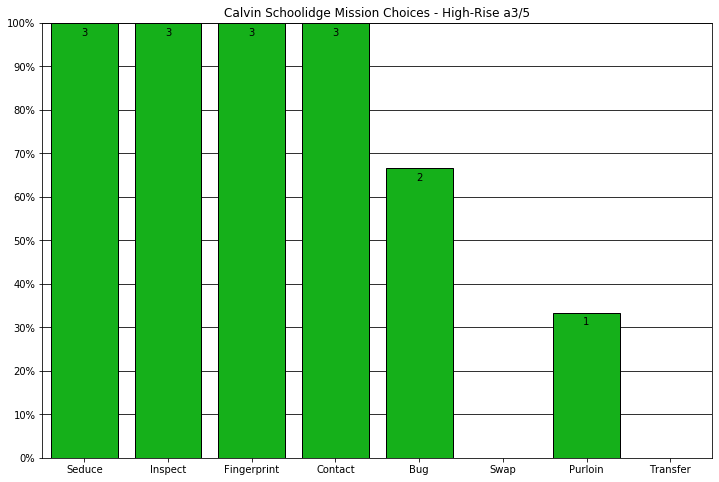

In [15]:
print_mission_choices(opp_spy_replays, f"{player} Mission Choices", SCL5_PICK_MODES)

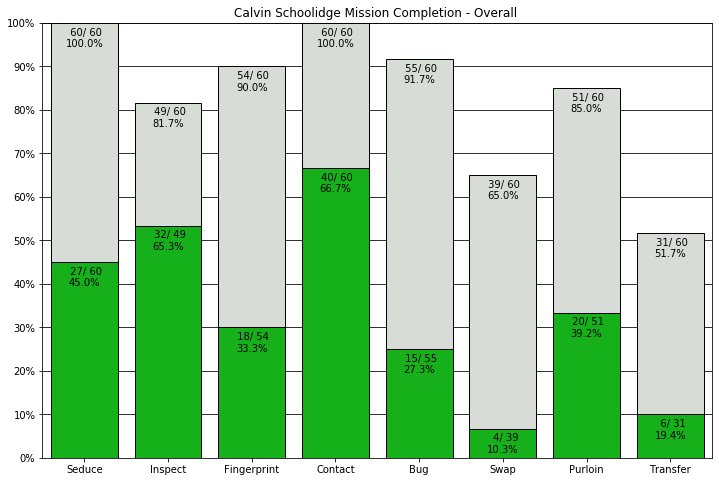

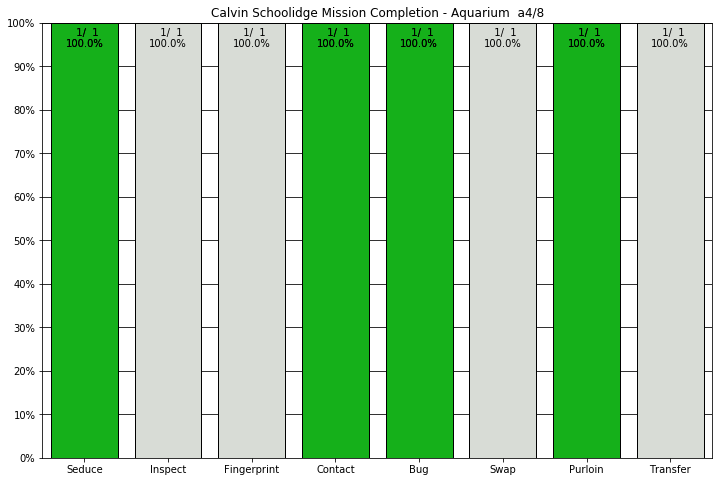

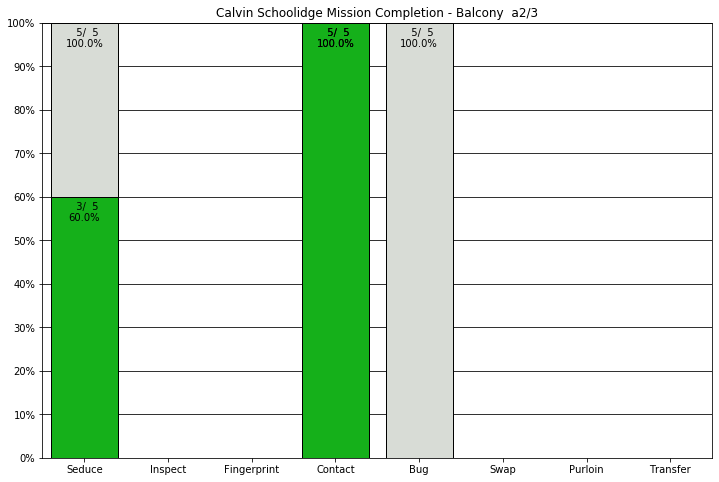

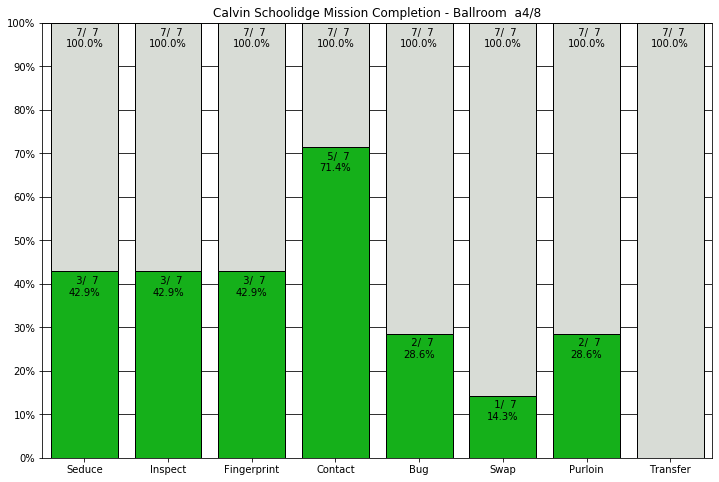

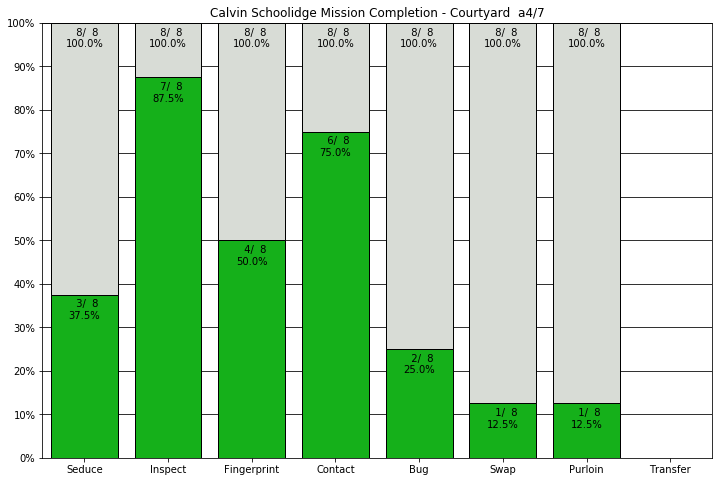

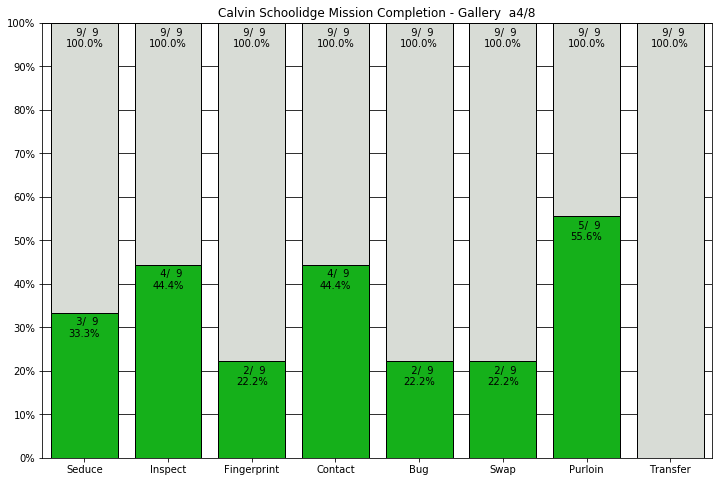

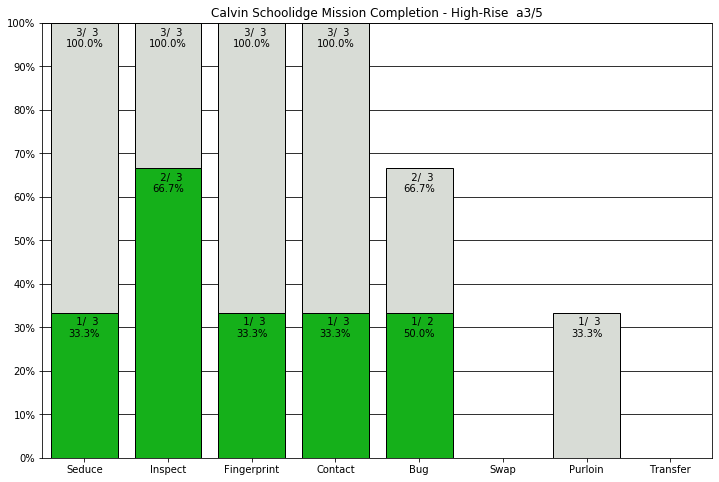

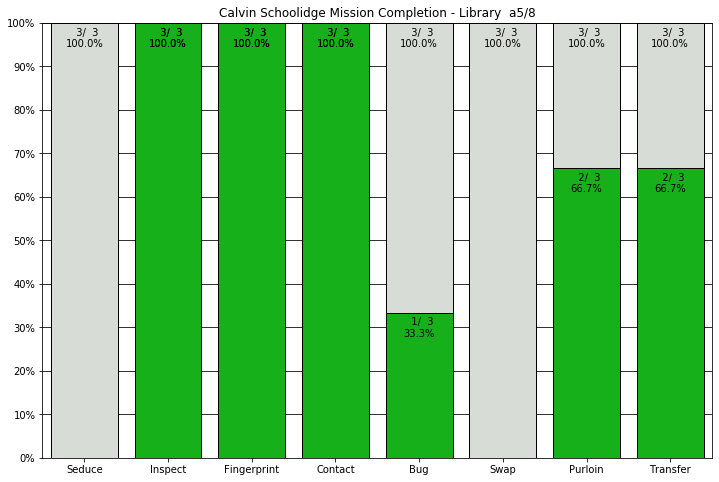

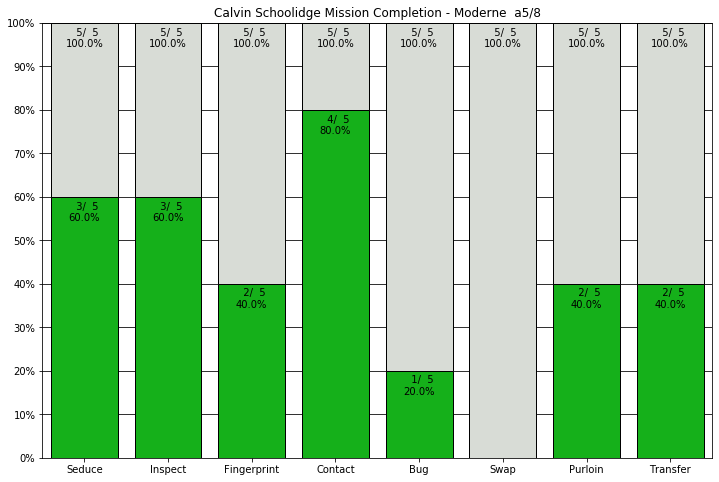

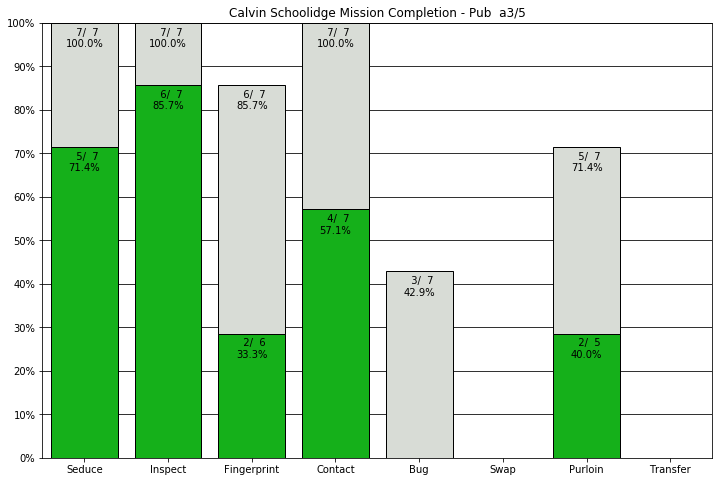

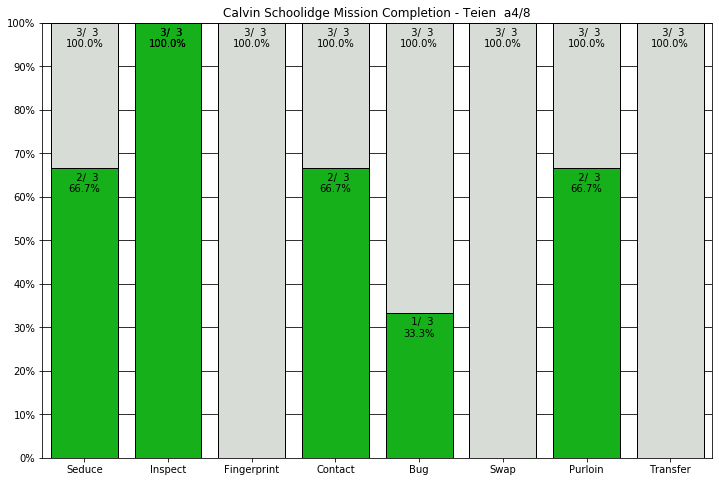

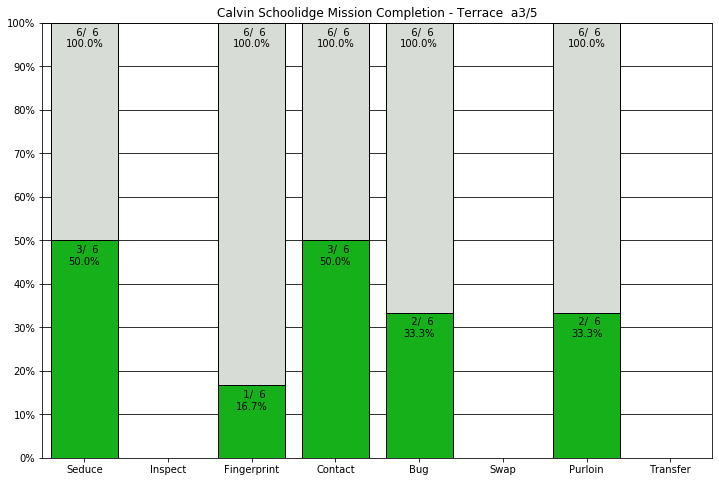

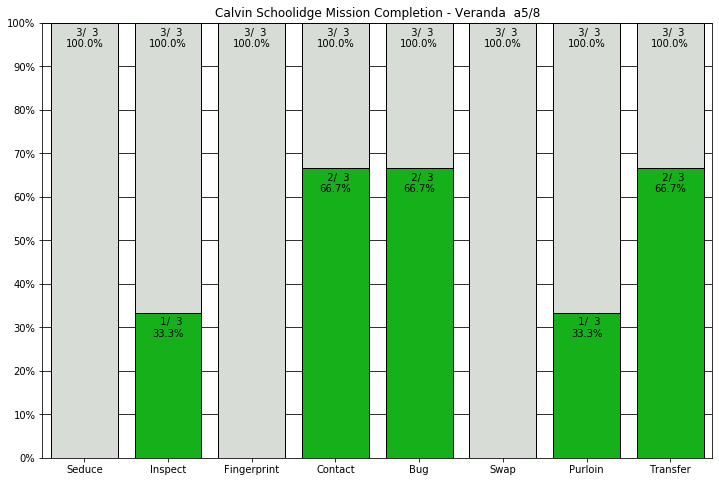

In [16]:
mission_completion(opp_spy_replays, f"{player} Mission Completion", SCL5_VENUE_MODES)

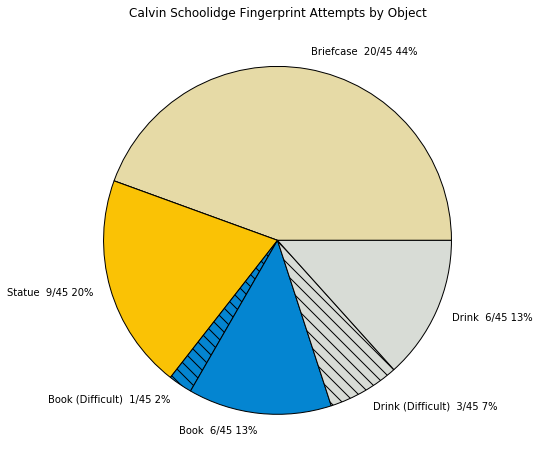

In [17]:
attempted_fingerprint_sources(opp_spy_replays, f"{player} Fingerprint Attempts by Object")

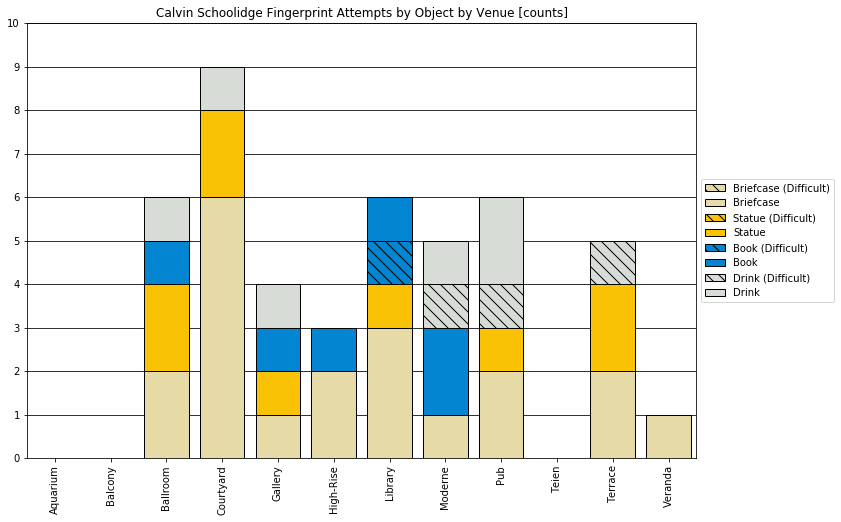

In [18]:
attempted_fingerprint_sources(
    opp_spy_replays,
    f"{player} Fingerprint Attempts by Object by Venue",
    groupby=lambda g: g.venue,
    percentile_plot=False)

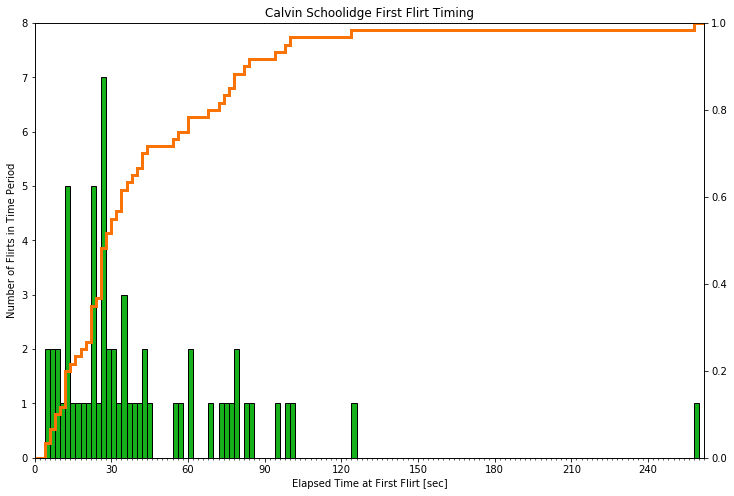

In [19]:
first_flirt_timing(opp_spy_replays, f"{player} First Flirt Timing")

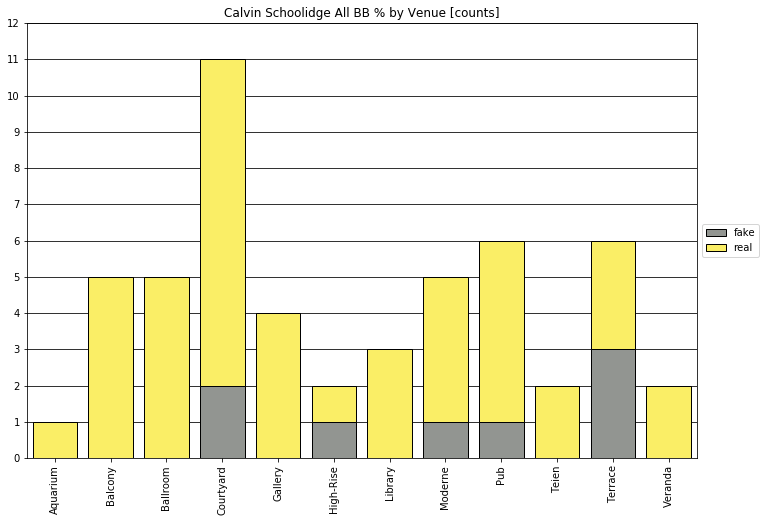

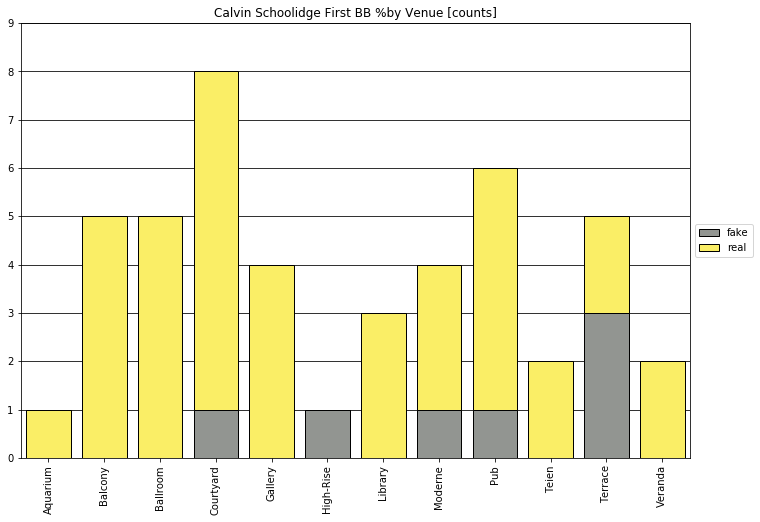

In [20]:
all_banana_bread_percentages(opp_spy_replays, f"{player} All BB % by Venue",
    groupby=lambda g: g.venue,
    percentile_plot=False)
first_banana_bread_percentages(opp_spy_replays, f"{player} First BB %by Venue",
    groupby=lambda g: g.venue,
    percentile_plot=False)

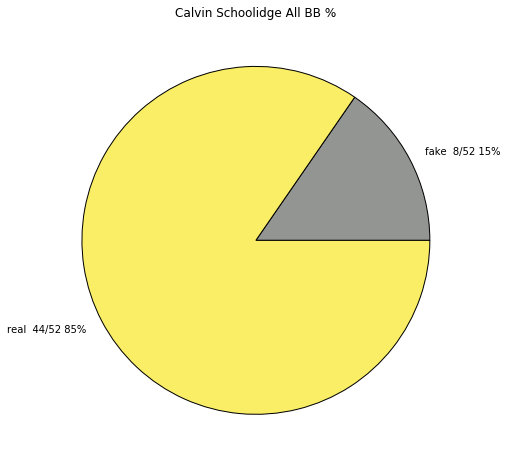

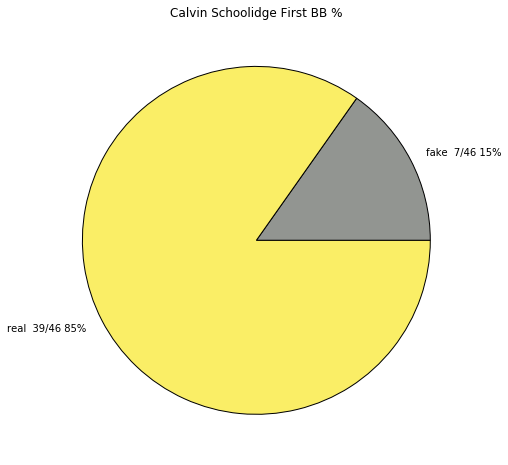

In [21]:
all_banana_bread_percentages(opp_spy_replays, f"{player} All BB %")
first_banana_bread_percentages(opp_spy_replays, f"{player} First BB %")

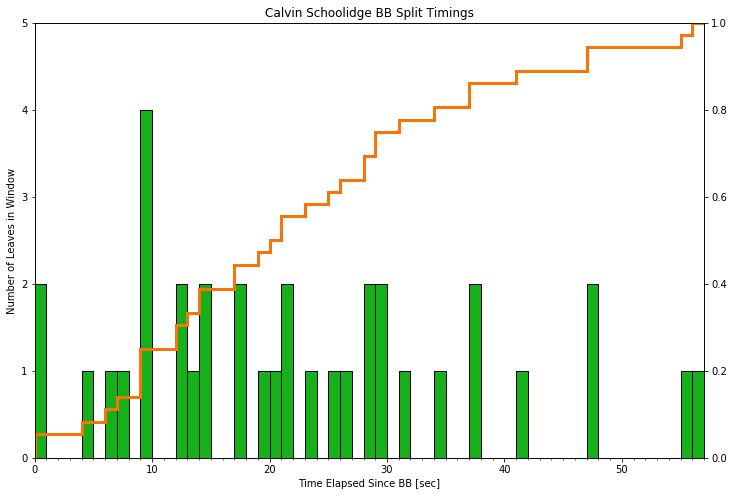

In [22]:
banana_split(opp_spy_replays, f"{player} BB Split Timings")

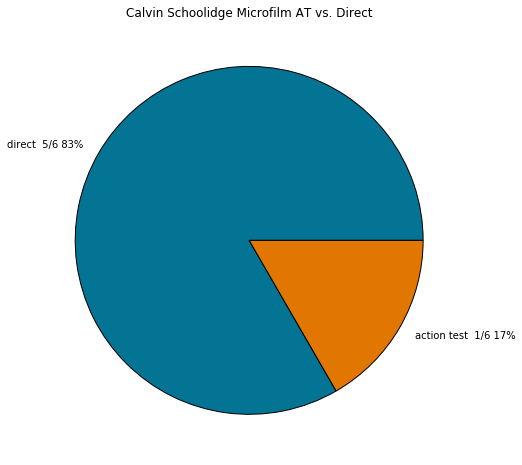

In [23]:
at_or_direct_mf(opp_spy_replays, f"{player} Microfilm AT vs. Direct")

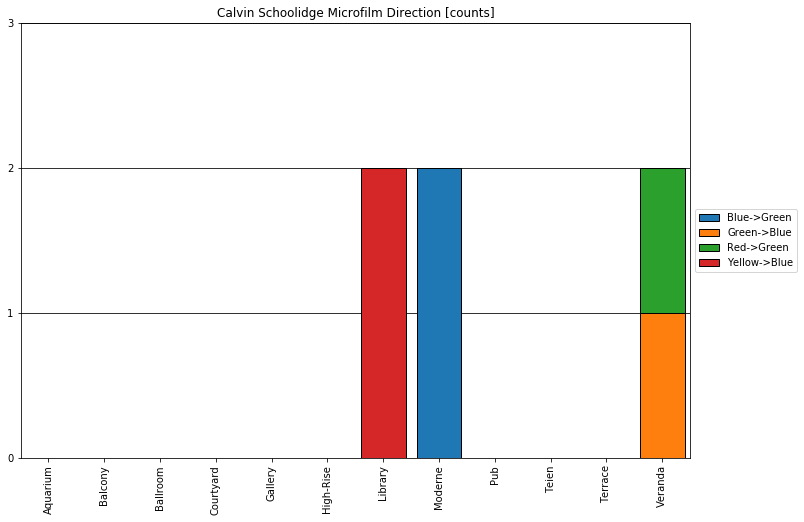

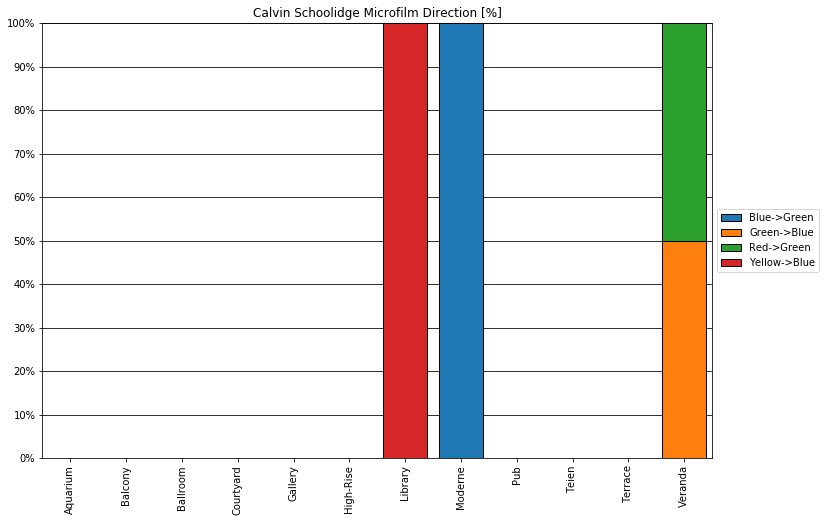

In [24]:
microfilm_direction(
    opp_spy_replays,
    f"{player} Microfilm Direction",
    groupby=lambda g: g.venue,
)

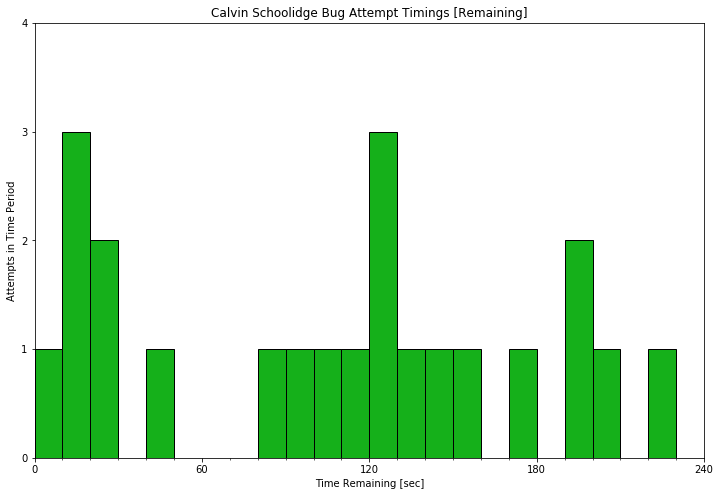

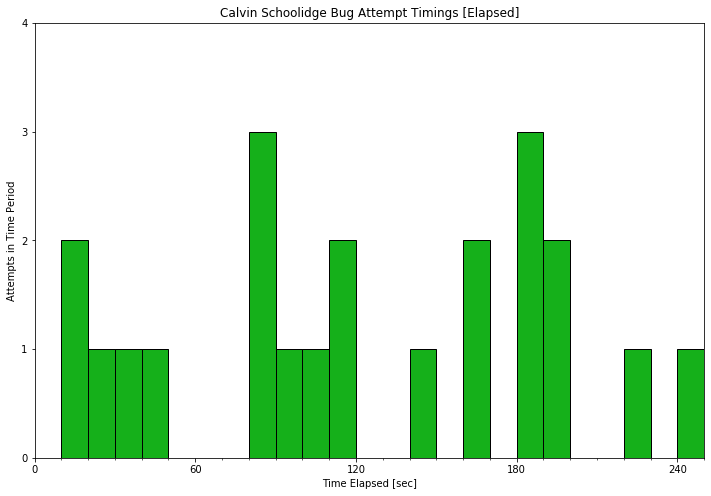

In [25]:
bug_attempt_timings(opp_spy_replays, f"{player} Bug Attempt Timings")

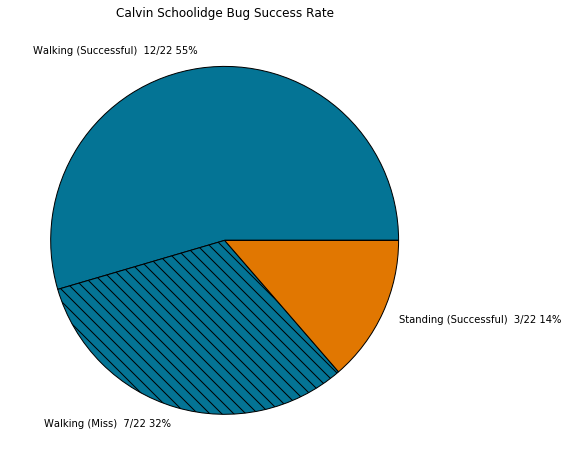

In [26]:
bug_success_rate(opp_spy_replays, f"{player} Bug Success Rate")

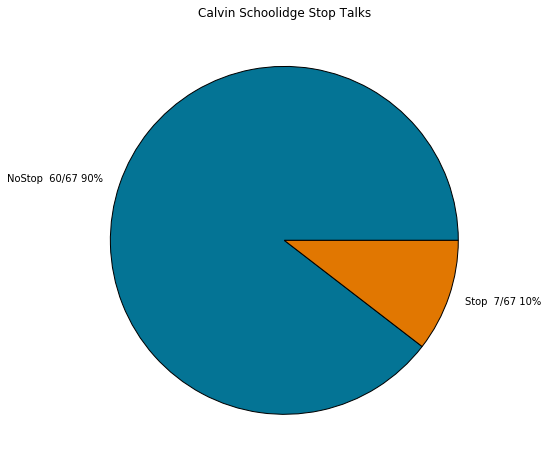

In [27]:
stop_talk_in_game_percentage(opp_spy_replays, f"{player} Stop Talks")

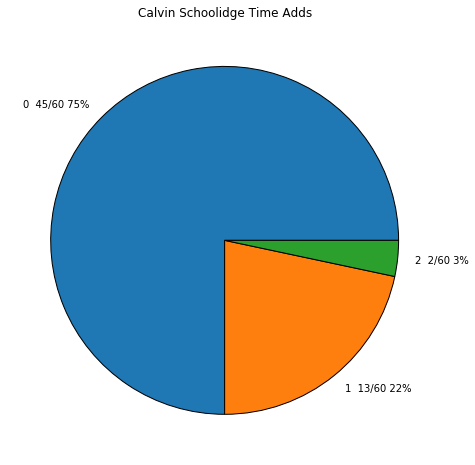

In [28]:
time_add_times_per_game(opp_spy_replays, f"{player} Time Adds")

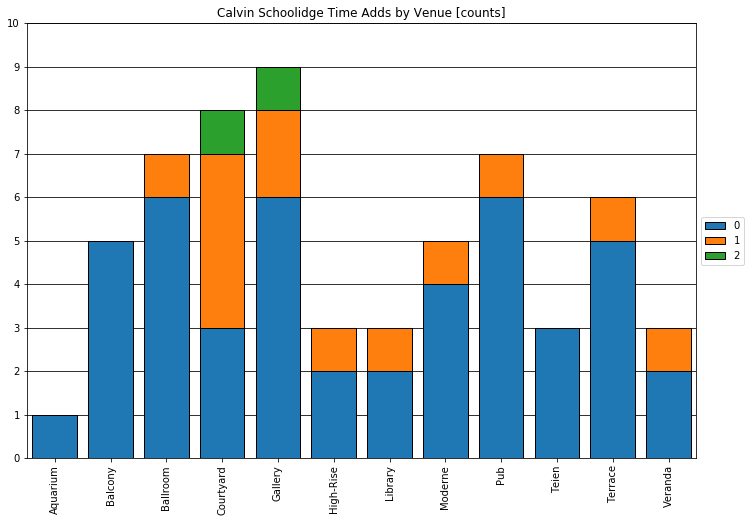

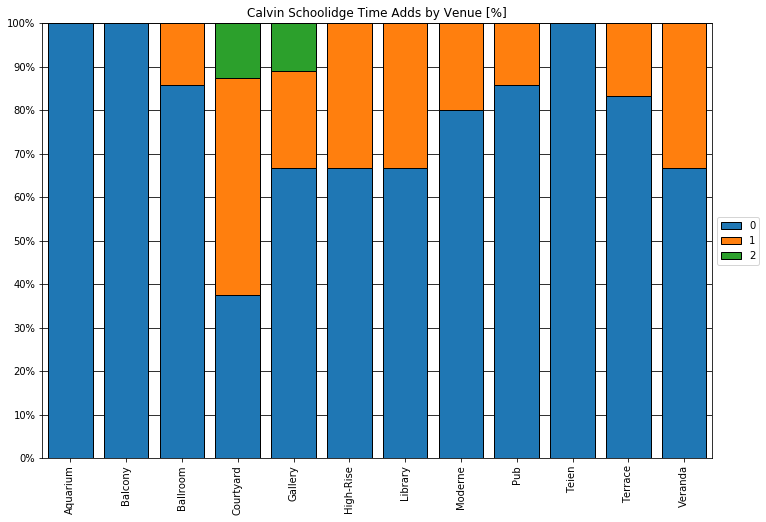

In [29]:
time_add_times_per_game(opp_spy_replays, f"{player} Time Adds by Venue", groupby=lambda g: g.venue)

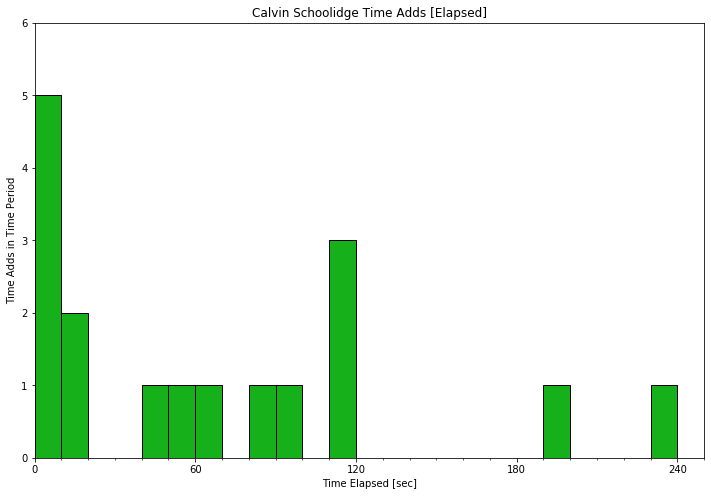

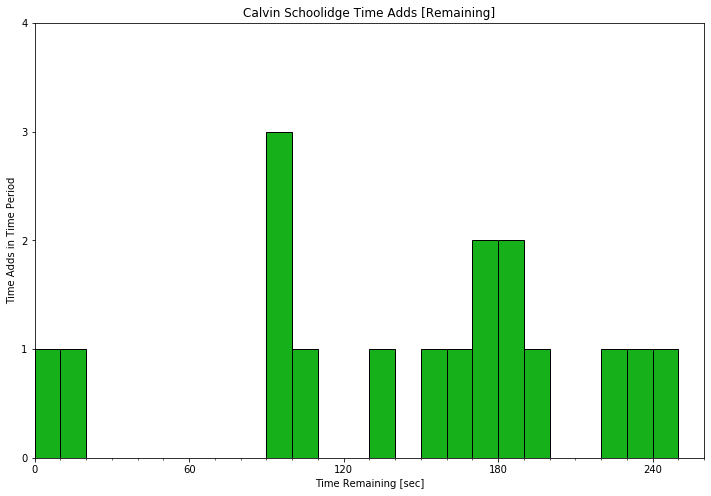

In [30]:
time_add_times(opp_spy_replays, f"{player} Time Adds")